In [103]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb


# store path
crimeData = "crimeDataWithPhase.csv"

In [41]:
# pull in csvfile
crimeData_df=pd.read_csv("crimeDataWithPhase.csv")

In [42]:
# Preview data
crimeData_df.head()

,DateOccured,Crime,UCRCrime,Phase,DayofWeek
0,2008-01-01,21000.0,Forcible Rape,New Moon,Tuesday
1,2008-01-01,67601.0,Larceny-theft,New Moon,Tuesday
2,2008-01-01,44026.0,Aggravated Assault,New Moon,Tuesday
3,2008-01-01,21000.0,Forcible Rape,New Moon,Tuesday
4,2008-01-01,21000.0,Forcible Rape,New Moon,Tuesday


In [43]:
# what is data type?
crimeData_df.dtypes

DateOccured     object
Crime          float64
UCRCrime        object
Phase           object
DayofWeek       object
dtype: object

In [44]:
# Add count column
crimeData_df['Count'] = (crimeData_df['Crime']>0).astype(int)

In [45]:
crimeData_df.head()

,DateOccured,Crime,UCRCrime,Phase,DayofWeek,Count
0,2008-01-01,21000.0,Forcible Rape,New Moon,Tuesday,1
1,2008-01-01,67601.0,Larceny-theft,New Moon,Tuesday,1
2,2008-01-01,44026.0,Aggravated Assault,New Moon,Tuesday,1
3,2008-01-01,21000.0,Forcible Rape,New Moon,Tuesday,1
4,2008-01-01,21000.0,Forcible Rape,New Moon,Tuesday,1


In [46]:
# Change DateOccured format to date
crimeData_df["DateOccured"] = pd.to_datetime(crimeData_df.DateOccured)
crimeData_df.dtypes

DateOccured    datetime64[ns]
Crime                 float64
UCRCrime               object
Phase                  object
DayofWeek              object
Count                   int32
dtype: object

In [47]:
# Converting DateOccured to First of the month so I can roll up data 
crimeData_df.DateOccured = pd.to_datetime(crimeData_df.DateOccured.values.astype('datetime64[M]'))

In [53]:
groupedCrimes = crimeData_df.groupby(["UCRCrime", "Phase", "DateOccured"]).sum()
print(groupedCrimes)

                                                  Crime  Count
UCRCrime           Phase         DateOccured                  
Aggravated Assault First Quarter 2008-01-01   3230448.0     77
                                 2008-02-01   2382994.0     57
                                 2008-03-01   3447073.0     83
                                 2008-04-01   2481178.0     59
                                 2008-05-01   3096544.0     74
                                 2008-06-01   3943259.0     94
                                 2008-07-01   4690927.0    112
                                 2008-08-01   3696962.0     88
                                 2008-09-01   3755251.0     90
                                 2008-10-01   4060492.0     97
                                 2008-11-01   6988498.0    167
                                 2008-12-01   4235653.0    101
                                 2009-01-01   3157489.0     75
                                 2009-02-01   2843103.0

In [56]:
groupedCrimes.head()

Crime  Count
UCRCrime           Phase         DateOccured                  
Aggravated Assault First Quarter 2008-01-01   3230448.0     77
                                 2008-02-01   2382994.0     57
                                 2008-03-01   3447073.0     83
                                 2008-04-01   2481178.0     59
                                 2008-05-01   3096544.0     74

In [58]:
# Data is now in usable format - exporting to csv then bringing back 
groupedCrimes.to_csv("groupeddata.cvs")

In [59]:
#pull in 2nd csvfile
GroupedcrimeData_df=pd.read_csv("groupeddata.cvs")

In [26]:
GroupedcrimeData_df.head()

,UCRCrime,Phase,month,Crime,Count
0,Aggravated Assault,First Quarter,2008-02-01,3230448.0,77
1,Aggravated Assault,First Quarter,2008-03-01,2382994.0,57
2,Aggravated Assault,First Quarter,2008-04-01,3447073.0,83
3,Aggravated Assault,First Quarter,2008-05-01,2481178.0,59
4,Aggravated Assault,First Quarter,2008-06-01,3096544.0,74


In [64]:
pd.pivot_table(GroupedcrimeData_df,index=["UCRCrime"], columns = ["Phase"], values = ['Count'],
                      aggfunc=[np.sum,np.mean, np.std])


sum                                  \
                            Count                                   
Phase               First Quarter Full Moon Last Quarter New Moon   
UCRCrime                                                            
Aggravated Assault           9760      9647         9217     9862   
Arson                         725       754          648      690   
Burglary                    13337     13488        13349    13261   
Criminal Homicide             442       482          392      442   
Forcible Rape                 621       592          665      661   
Larceny-theft               37115     37175        37099    37127   
Motor Vehicle Theft         11349     11486        11310    11204   
Robbery                      5235      5206         5282     5369   

                             mean                                       \
                            Count                                        
Phase               First Quarter   Full Moon Last Quarter    New Moon   
UCRCrime                                                                 
Aggravated Assault      79.349593   78.430894    74.934959   80.178862   
Arson                    5.894309    6.389831     5.400000    5.750000   
Burglary               108.430894  109.658537   108.528455  107.813008   
Criminal Homicide        3.810345    4.016667     3.379310    3.946429   
Forcible Rape            5.132231    4.892562     5.495868    5.462810   
Larceny-theft          301.747967  302.235772   301.617886  301.845528   
Motor Vehicle Theft     92.268293   93.382114    91.951220   91.089431   
Robbery                 42.560976   42.325203    42.943089   43.650407   

                              std                                     
                            Count                                     
Phase               First Quarter  Full Moon Last Quarter   New Moon  
UCRCrime                                                              
Aggravated Assault      25.744961  23.999003    19.402864  21.621571  
Arson                    3.482540   3.769046     2.769583   2.948436  
Burglary                41.289081  42.803560    39.859451  39.092440  
Criminal Homicide        2.295227   2.473331     2.011511   2.091765  
Forcible Rape            2.949413   2.679557     3.191457   2.935533  
Larceny-theft           75.618932  81.520095    75.456482  70.525432  
Motor Vehicle Theft     40.544465  44.256799    38.084215  39.966176  
Robbery                 15.462883  14.754547    14.741655  12.378580

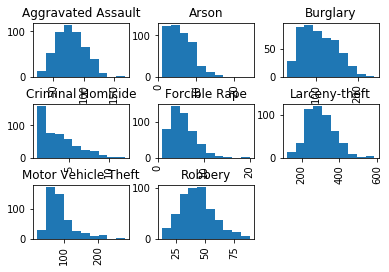

In [67]:
# Need to see if data is normally distributed.  Histogram of monthly counts by each type of crime.  
# Visually Aggravated assault has the most normally distributed data folled by Larceny theft then Robbery

GroupedcrimeData_df.hist(by='UCRCrime',column = 'Count')
plt.savefig("UCR Crime Count by Month")
plt.show()

In [80]:
FinalData = pd.pivot_table(GroupedcrimeData_df,index=["UCRCrime","DateOccured"], columns = ["Phase"], values = ['Count'])
print(FinalData)

                                       Count                                
Phase                          First Quarter Full Moon Last Quarter New Moon
UCRCrime           DateOccured                                              
Aggravated Assault 2008-01-01           77.0      82.0         65.0     78.0
                   2008-02-01           57.0      36.0         82.0     72.0
                   2008-03-01           83.0      96.0         85.0     89.0
                   2008-04-01           59.0     125.0        108.0    113.0
                   2008-05-01           74.0     123.0        107.0     94.0
                   2008-06-01           94.0      90.0        103.0     97.0
                   2008-07-01          112.0     121.0         95.0    104.0
                   2008-08-01           88.0     105.0        117.0     83.0
                   2008-09-01           90.0      96.0        106.0     38.0
                   2008-10-01           97.0     118.0         78.0     83.0

In [93]:
# Data is now in usable format to run stats - exporting to csv then bringing back 
FinalData.to_csv("FinalData.cvs", header=False)

In [94]:
#pull in 2nd csvfile
FinalData=pd.read_csv("FinalData.cvs")

In [95]:
FinalData.head()

,0,Phase,Unnamed: 2,First Quarter,Full Moon,Last Quarter,New Moon
0,1,UCRCrime,DateOccured,NaN,NaN,NaN,NaN
1,2,Aggravated Assault,2008-01-01,77.0,82.0,65.0,78.0
2,3,Aggravated Assault,2008-02-01,57.0,36.0,82.0,72.0
3,4,Aggravated Assault,2008-03-01,83.0,96.0,85.0,89.0
4,5,Aggravated Assault,2008-04-01,59.0,125.0,108.0,113.0


In [96]:
AA=FinalData[(FinalData.Phase == 'Aggravated Assault')]
AA.head()

,0,Phase,Unnamed: 2,First Quarter,Full Moon,Last Quarter,New Moon
1,2,Aggravated Assault,2008-01-01,77.0,82.0,65.0,78.0
2,3,Aggravated Assault,2008-02-01,57.0,36.0,82.0,72.0
3,4,Aggravated Assault,2008-03-01,83.0,96.0,85.0,89.0
4,5,Aggravated Assault,2008-04-01,59.0,125.0,108.0,113.0
5,6,Aggravated Assault,2008-05-01,74.0,123.0,107.0,94.0


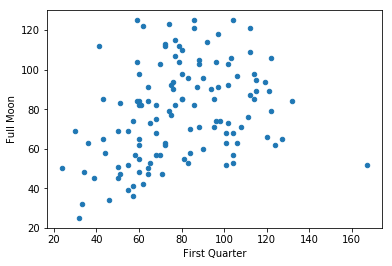

In [109]:
AA.plot.scatter("First Quarter", "Full Moon")
plt.savefig("Aggravated Assault FirstQtr Full Moon")

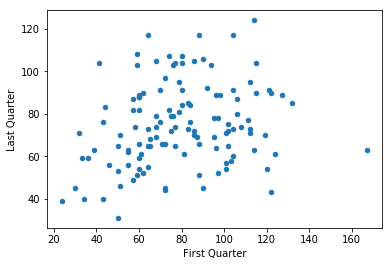

In [110]:
AA.plot.scatter("First Quarter", "Last Quarter")
plt.savefig("Aggravated Assault FirstQtr LastQtr")

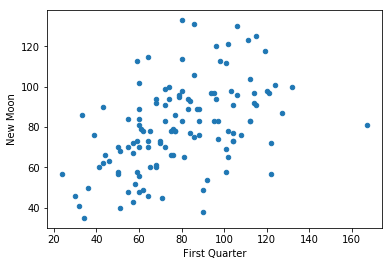

In [111]:
AA.plot.scatter("First Quarter", "New Moon")
plt.savefig("Aggravated Assault FirstQtr NewMoon")

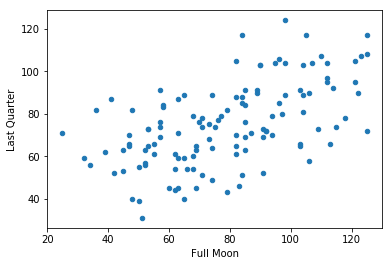

In [112]:
AA.plot.scatter("Full Moon", "Last Quarter")
plt.savefig("Aggravated Assault FullMoon LastQtr")

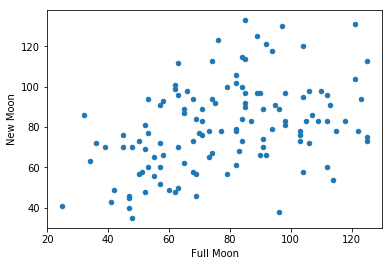

In [113]:
AA.plot.scatter("Full Moon", "New Moon")
plt.savefig("Aggravated Assault FullMoon NewMoon")

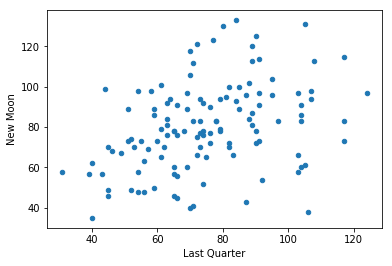

In [114]:
AA.plot.scatter("Last Quarter", "New Moon")
plt.savefig("Aggravated Assault LastQtr New Moon")

In [123]:
FQ = AA['First Quarter']
FM = AA['Full Moon']
LQ = AA['Last Quarter']
NM = AA['New Moon']

pearsonr_coefficient, p_value = pearsonr(FQ,FM)
print (pearsonr_coefficient)

0.31606616433085066


In [124]:
pearsonr_coefficient, p_value = pearsonr(FQ,LQ)
print (pearsonr_coefficient)

0.22662134830444397


In [125]:
pearsonr_coefficient, p_value = pearsonr(FQ,NM)
print (pearsonr_coefficient)

0.4648196585990055


In [127]:
pearsonr_coefficient, p_value = pearsonr(FM,LQ)
print (pearsonr_coefficient)

0.5582622534583026


In [128]:
pearsonr_coefficient, p_value = pearsonr(LQ,NM)
print (pearsonr_coefficient)

0.36572657126392616


In [129]:
pearsonr_coefficient, p_value = pearsonr(FM,NM)
print (pearsonr_coefficient)

0.4132751548558384
